In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'w'
import random

In [2]:
# random.randint(a, b)
# Return a random integer N such that a <= N <= b.

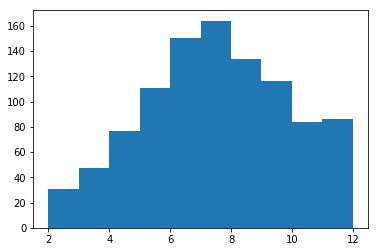

In [3]:
num_runs = 1000
dice_sum = [random.randint(1, 6)+random.randint(1, 6) for _ in range(num_runs)]
plt.hist(dice_sum);

In [6]:
die_A = {1: 2, 2: 2, 3: 4, 4: 4, 5: 9, 6: 9}
die_B = {1: 1, 2: 1, 3: 6, 4: 6, 5: 8, 6: 8}
die_C = {1: 3, 2: 3, 3: 5, 4: 5, 5: 7, 6: 7}

In [8]:
die_A[1]

2

In [9]:
def die_run_sum(num_runs=100):
    dice_runs = [random.randint(1, 6) for _ in range(num_runs)]
    return dice_runs

[1, 7, 0, 200]

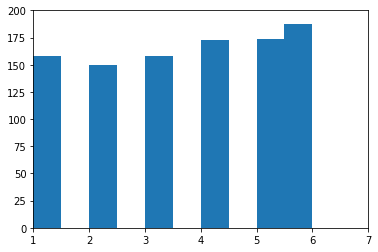

In [18]:
a = die_run_sum(1000)
plt.hist(die_run_sum(1000))
plt.axis([1, 7, 0, 200])

In [15]:
a

[5,
 6,
 5,
 4,
 3,
 6,
 6,
 2,
 6,
 5,
 1,
 5,
 1,
 1,
 5,
 4,
 6,
 6,
 3,
 4,
 6,
 2,
 1,
 6,
 3,
 5,
 6,
 3,
 6,
 2,
 4,
 3,
 2,
 1,
 5,
 2,
 1,
 3,
 2,
 2,
 3,
 1,
 1,
 1,
 2,
 5,
 3,
 3,
 5,
 4,
 2,
 3,
 2,
 6,
 6,
 1,
 2,
 3,
 2,
 6,
 1,
 1,
 5,
 4,
 5,
 5,
 2,
 2,
 3,
 3,
 4,
 5,
 5,
 3,
 4,
 5,
 5,
 3,
 6,
 6,
 4,
 1,
 6,
 1,
 5,
 2,
 3,
 3,
 1,
 6,
 5,
 5,
 6,
 3,
 2,
 6,
 6,
 4,
 2,
 4,
 6,
 3,
 5,
 1,
 2,
 4,
 1,
 4,
 3,
 5,
 2,
 3,
 5,
 3,
 1,
 1,
 3,
 1,
 5,
 5,
 3,
 4,
 2,
 6,
 1,
 6,
 5,
 5,
 3,
 4,
 3,
 6,
 2,
 4,
 1,
 1,
 5,
 4,
 3,
 3,
 2,
 4,
 6,
 4,
 3,
 2,
 4,
 5,
 4,
 4,
 1,
 4,
 5,
 5,
 6,
 4,
 4,
 3,
 2,
 4,
 1,
 4,
 3,
 2,
 2,
 6,
 6,
 6,
 3,
 5,
 3,
 5,
 5,
 6,
 5,
 4,
 3,
 1,
 5,
 4,
 4,
 1,
 4,
 6,
 3,
 5,
 6,
 6,
 6,
 1,
 6,
 3,
 5,
 3,
 6,
 2,
 3,
 5,
 2,
 5,
 4,
 2,
 4,
 4,
 3,
 5,
 6,
 6,
 1,
 4,
 3,
 6,
 1,
 4,
 1,
 6,
 6,
 4,
 3,
 3,
 3,
 4,
 6,
 3,
 6,
 4,
 4,
 2,
 5,
 2,
 2,
 1,
 3,
 1,
 3,
 2,
 5,
 6,
 1,
 5,
 1,
 4,
 1,
 2,
 3,
 6,
 4,
 2,
 2,
 3,
